This code will be using the CompositeNanoObject to construct arbitrary arrangements
of NanoObjects. In this case, we'll be combining two cylinders together.

Type 'CompositeNanoObject?' in an ipython environment for more details.

There are generally three types of curves that each yield interesting information:
1. $|P(q)|^2$ : The particle form factor
2. $I(q)$ : The measured intensity of the system. For systems of one particle, $I(q)$ is $|P(q)|^2$ (with an arbitrary weighting factor).
3. $S(q) = \frac{I(q)}{|P(q)|^2}$ : The structure factor


We'll use a two cylinder model to walk through each of these.

In [3]:
from ScatterSim.NanoObjects import CylinderNanoObject, PolydisperseNanoObject
from ScatterSim.CompositeNanoObjects import CompositeNanoObject
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Helper functions, we just declare them to remove dependencies on other files
# Ignore these and skip ahead
def form_factor_slices(smod, qmax):
    ''' Compute the xy, xz, and yz projections.
    
    '''
    q = np.linspace(-qmax, qmax,100)
    QCOLS, QROWS = np.meshgrid(q,q, indexing="ij")
    Q0 = QROWS*0
    P2_xy = smod.form_factor_squared(np.array([QCOLS, QROWS, Q0]))
    P2_yz = smod.form_factor_squared(np.array([Q0, QCOLS, QROWS]))
    P2_xz = smod.form_factor_squared(np.array([QCOLS, Q0, QROWS]))

    return P2_xy, P2_yz, P2_xz

def show_qslices(F_xy, F_yz, F_xz, height, num=4, **kwargs):
    '''plot the xy, xz, and yz projections with height used from 
        projections function, in figure num
    '''
    extent = 2*np.pi/height*np.array([-1, 1, -1, 1])
    plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(F_xy,extent=extent, **kwargs)
    plt.subplot(2,2,2)
    plt.title("y-z plane")
    plt.imshow(F_yz, extent=extent, **kwargs)
    plt.subplot(2,2,3)
    plt.title("x-z plane")
    plt.imshow(F_xz,extent=extent, **kwargs)
    

def show_projections(V_xy, V_xz, V_yz, height, num=4):
    '''plot the xy, xz, and yz projections with height used from 
        projections function, in figure num
    '''
    extent = [-height, height, height, -height]
    plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(V_xy,extent=extent)
    plt.subplot(2,2,2)
    plt.title("y-z plane")
    plt.imshow(V_yz,extent=extent)
    plt.subplot(2,2,3)
    plt.title("x-z plane")
    plt.imshow(V_xz,extent=extent)


### Aside on the rotations:
The rotations are defined via three angles: eta ($\eta$), phi ($\phi$), theta ($\theta$)

The are defined in NanoObjects.rotation_elements (documentation is coming later on...). The
text from this is here:

Three-axis rotation:
1. Rotate about +z by eta (counter-clockwise in x-y plane)
2. Tilt by phi with respect to +z (rotation about y-axis,
    clockwise in x-z plane) then
3. rotate by theta in-place (rotation about z-axis,
    counter-clockwise in x-y plane)
    
The nano objects are rotated with respect to their reference frame. See the help docs on what their initial orientation is with respect to this frame. For example, CylinderNanoObject?  gives this text:

    A cylinder nano-object. The canonical (unrotated) version
    has the circular-base in the x-y plane, with the length along z.
    


In [3]:
# we first decide the parameters to define our cylinders
# For fun, we'll tilt them as well using the 'phi' parameter
# set to zero to remove tilt
pargs_cyl_left  = {'radius' : 1, 'height' : 1, 'x0' : -2, 'phi' : -45}
pargs_cyl_right = {'radius' : 1, 'height' : 1, 'x0' : 2, 'phi' : 45}

# the object classes
cylobjs = [CylinderNanoObject, CylinderNanoObject]
# the pargs for each object
cylparams = [pargs_cyl_left, pargs_cyl_right]
# Some defaults for each object (they only inherit them if these parameters
# are not defined in their potential arguments)
cyldefaults = {'rho' : 15, 'rho_ambient' : 0}

cylinders = CompositeNanoObject(cylobjs, cylparams, pargs=cyldefaults)

# also initialize one cylinder just to compare to later
pargs_cyl_one = {'radius' : 1, 'height' : 1}
pargs_cyl_one.update(cyldefaults) # update parameters with defaults of previous two cylinders
one_cylinder = CylinderNanoObject(pargs_cyl_one)

# Now choose a q domain for the plotting. The units of q will be the inverse of units you supply
# as parameters to the object. For example, we used nanometers, so q will be in inverse nanometers
q = np.linspace(0, 10, 1000)



In [4]:
# For any object, you can compute the form factor or projection. See functions
# above on how to do it.
# P2 means |P|^2 (form factor squared)
qmax = 10
P2_xy, P2_yz, P2_xz = form_factor_slices(cylinders, qmax)
rmax = 4
V_xy, V_yz, V_xz = cylinders.projections(rmax)

In [5]:
# remember this is a 3D Object. We can look at projections of the object in real space
# or slices of the scattering in Fourier (reciprocal) space 

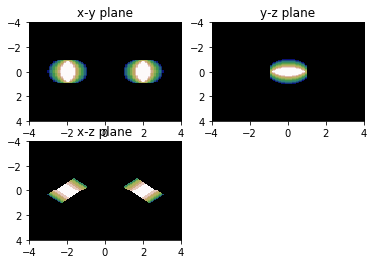

In [6]:
show_projections(V_xy, V_yz, V_xz, rmax, num=2)

In [7]:
# Showing the form factors

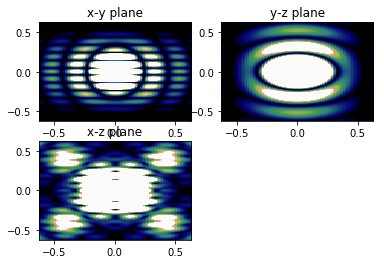

In [8]:
show_qslices(P2_xy, P2_yz, P2_xz, qmax, num=5, vmin=0, vmax=6e1)

What we really measure generally are suspensions of particles in solution,
so let's again compute the orientationally averaged version

In [9]:
# Computation 
import time
t1 = time.time()
sq_cylinders = cylinders.form_factor_squared_isotropic(q)
sq_one_cylinder = one_cylinder.form_factor_squared_isotropic(q)
t2 = time.time()
print("time elapsed : {}".format(t2-t1))

time elapsed : 2.8589231967926025


Play with the orientation, and you'll notice quite different results for the structure factor for the same system!!

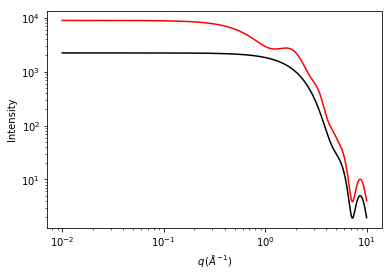

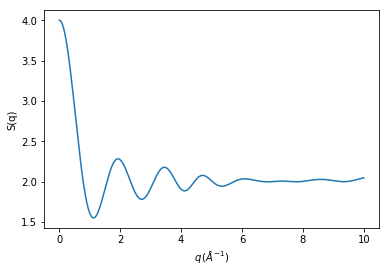

In [10]:
plt.figure(0);
plt.clf()
plt.loglog(q, sq_one_cylinder,color='k', label="one cylinder")
plt.loglog(q, sq_cylinders,color='r', label="two cylinders")
plt.xlabel("$q\,(\AA^{-1})$")
plt.ylabel("Intensity")

# it is also nice to see what structure two cylinders adds to 
# the one cylinder scattering. This is the structure factor (ratio of the two)
# This is also known as S(q)
structure_factor = sq_cylinders/sq_one_cylinder
# Also, note that we are now using "plot"
# always make sure to choose correct plot scaling (log or linear)
plt.figure(1);
plt.clf();
plt.plot(q, structure_factor)
plt.xlabel("$q\,(\AA^{-1})$")
plt.ylabel("S(q)")